<a href="https://colab.research.google.com/github/ambika1us/Retail_Sales_Prediction/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<B><H1>Project Title: Sales Prediction: Predicting sales of a store chain Rossmann</B></H1>

<B>Problem Description</B>
<P>Rossmann operates over 3000 drug store in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance, store sales are influenced by many factors including promotions, competition, school and state holidays, seasonality and locality, With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.</P>
<P>You are provided with historical sales data for 1115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbisment</P>


<P><B>Data Description</B></P>
<P><LI>Rossmann Store Data.csv - Historical data including Sales</LI><LI>store.csv - supplemental information about the store</LI></P>

<P>Data Fields</P>
<P>Most of the fields are self-explanatory</P>
<LI><b>id: </b>an Id that represent a duple within the set</LI>
<LI><b>Store: </b>a unique Id for each store</LI>
<LI><b>Sales: </b>the turnover for any given day</LI>
<LI><b>Customers: </b>the number of customers on a given day</LI>
<LI><b>Open: </b>an indicator for whether the store was open. 0=Closed 1=Open</LI>
<LI><b>StateHoliday: </b>indicates a state holiday. Normally all stores, with few exceptions are closed on state holidays Note all school are closed on public holiday and weekends. a=public holiday, b=easter holiday, c=christmas, 0=none</LI>
<LI><b>SchoolHoliday: </b>indicates if the store was affected by the closure of public schools</LI>
<LI><b>StoreType: </b>differentiatesbetween 4 different store models a,b,c,d</LI>
<LI><b>Assortment: </b>descibes an assortment level, a=basic, b=extra, c=extended, An assortmet strategy in retailing involves the number and type of products that store display for purchase by customer</LI>
<LI><b>CompetitionDistance: </b>distance in meters to the nearest competitor store</LI>
<LI><b>CompetitionOpenSince: </b>given the approximate year and month of the time the nearest competitor was opened</LI>
<LI><b>Promo: </b>indicates whether a store is running a promo on that day</LI>
<LI><b>Promo2: </b>promo2 is a continuing and consecutive promotion for some stores, 0=store is not participating, 1=store is participating</LI>
<LI><b>Promo2Since: </b>describes the year and calendar week when the store started participating in promo2</LI>
<LI><b>PromoInterval: </b>describe the consecutive interval promo2 is started naming the months the promotion is started a new</LI>

<p><b>Business Problem</b></p>
<p>The interest in a product continues to change occasionally. No business can work on its monetary growth without assessing client interest and future demand of items precisely sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time. This project involves solving a real-world business problem of sales forecasting and building up a machine learning model for the same</p>
<p>Our goal here is to forecast the sales for six weeks for each store and find out the factors influencing it and recommend ways in order to improve the numbers.</p>

<p><b>Approach</b></p>
<li>Business Problem</li>
<li>Data Collection and Preprocessing</li>
<li>Exploratory Data Analysis</li>
<li>Feature selection and outlier detection</li>
<li>Modeling</li>
<li>Model Performance and Evaluation</li>
<li>Storewise sale predicting</li>
<li>Conclusion and Recommendations</li>

In [1]:
from matplotlib import figure
#importing important libraries and module
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h3>Data Collection and Preprocessing</h3>

In [3]:
#reading the csv file and converting it to pandas dataframe
sales_df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone_Project_Regression/Retail Sales Prediction/Rossmann Stores Data.csv")
store_df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone_Project_Regression/Retail Sales Prediction/store.csv")

In [4]:
#We have historical sales data and stores datasets
#first look of the sales data
sales_df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
#first look of the store data
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
#info about the sales dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


There are 1017209 rows or observations and 9 columns in this dataset. There seems to be no null values in it. It has integer, datetime and object as data type

In [7]:
#info about the store dataset
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


There are 1115 rows and 10 columns. There are missing values in it and it is important to impute them with appropriate values in order to get good result later on.

<h4>Missing Data Handling</h4>

In [8]:
#null values in store dataset
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Out of 1115 entries there are missing values for the columns
<li>CompetitionDistance: distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distance at which generally the store are opened and we would impute the values accordinigly.</li>
<li>CompetitionOpenSinceMonth:Gives the approximate month of the time the nearest competition was opened, mode of the column would tell us the most rccuring month.</li>
<li>CompetitionOpenSinceYear: gives the approximate year of the time the nearest competition was opened, mode of the column would tell us the most occuring month</li>
<li>Promo2SinceWeek,Promo2SinceYear and PromoInterval are NaN wherever promo2 is 0 or false as can be seen in the first look of the dataset. They can be replaced with 0</li>

Text(0.5, 0, 'Competition Distance Distribution Plot')

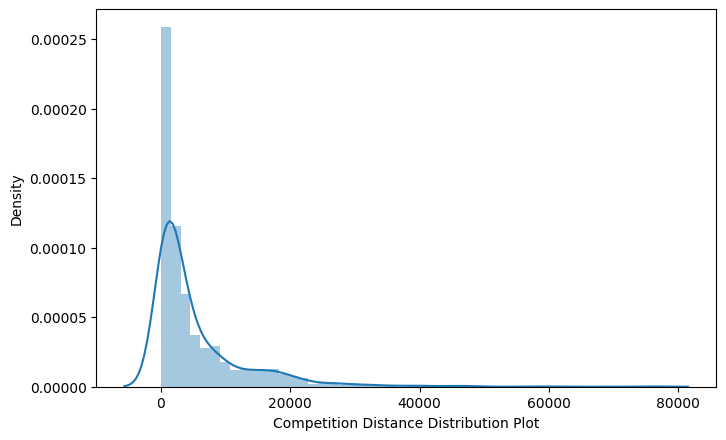

In [9]:
#distribution plot of competition distance
sns.distplot(x=store_df['CompetitionDistance'],hist=True)
plt.xlabel('Competition Distance Distribution Plot')

It seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. Median is more robust to outlier affect.

In [10]:
#filling competition distance with the median value
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace=True)

In [11]:
#filling competition open since month and year with the most occuring values of the column i.e. modes of those columns
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace=True)


In [12]:
#imputing the NaN values of promo2 related columns with 0
store_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
store_df['Promo2SinceYear'].fillna(value=0,inplace=True)
store_df['PromoInterval'].fillna(value=0,inplace=True)

In [13]:
#check
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Merging the two Datasets

In [14]:
#Merge the datasets on stores data
df=sales_df.merge(right=store_df,on="Store",how="left")

In [15]:
#first five rows of the merged dataset
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [16]:
#shape of the Dataset

df.shape

(1017209, 18)

Unique valus in Categorical Features

In [17]:
#datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [18]:
#Creating a categorical column list
categorical_variables=['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [19]:
#Checking the unique values involved and if all the values are in appropriate datatypes
for col in categorical_variables:
  print(f'Unique values for {col}:{df[col].unique()}')

Unique values for DayOfWeek:[5 4 3 2 1 7 6]
Unique values for Open:[1 0]
Unique values for Promo:[1 0]
Unique values for StateHoliday:['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday:[1 0]
Unique values for StoreType:['c' 'a' 'd' 'b']
Unique values for Assortment:['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth:[ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear:[2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2:[0 1]
Unique values for Promo2SinceWeek:[ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear:[   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval:[0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [20]:
#Change into int type
df['StateHoliday'].replace({'0':0},inplace=True)

<h3>Exploratory Data Analysis</h3>
<p>EDA is a crusial part of data analysis. It involves exploring and analyzing the dataset given to find patterns, trends and conclusion to make better decisions related to the data. Often using statistical graphics and other data visualization tools to summarize the result. Python libraries like pandas are used to explore the data and matplotlib and seaborn to visualize it. It includes analyzing what our dataset consists of. Exploring continous as well as categorical variables and their influence on our dependent variable 'Sales'</p>
<h4>Hypotheses</h4>
<p>Just by observing the head of the dataset and understanding the features involved in it. the following hypotheses could be framed</p>
<ol>
<li>There's a feature called "DayOfWeek" with the calues 1-7 denotes each day of week. There would be a week off probably Sunday when the stores would be closed and we would get low overall sales.</li>
<li>Customers would have a positive correlation with sales.</li>
<li>The store type and Assortment strategy involved would be having a certain effect on sales as well some premium high quality products would fetch more revenue.</li>
<li>Promotion should be having a positive correlation.</li>
<li>Some stores were closed due to refurbishment those would generate 0 revenue for that time period.</li>
<li>Stores are influenced by seasonality probably before holidays sales would be high.</li>
</ol>
<p>Next step is to explore and see in a data driven way about the factory influencing Rossmann store sales and how.</p>

<h4><B>Categorical Features:</B></h4>

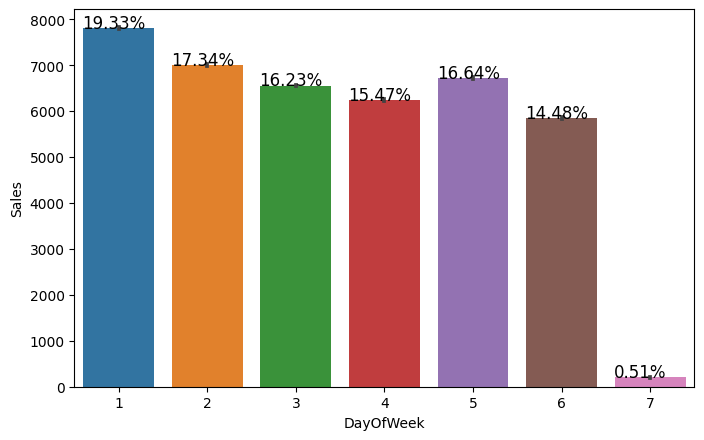

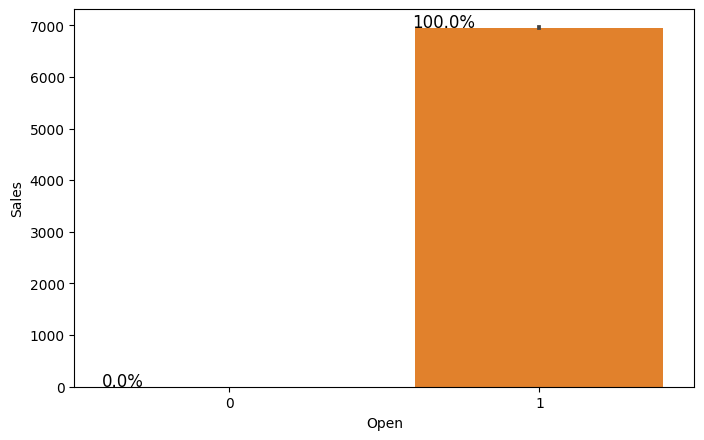

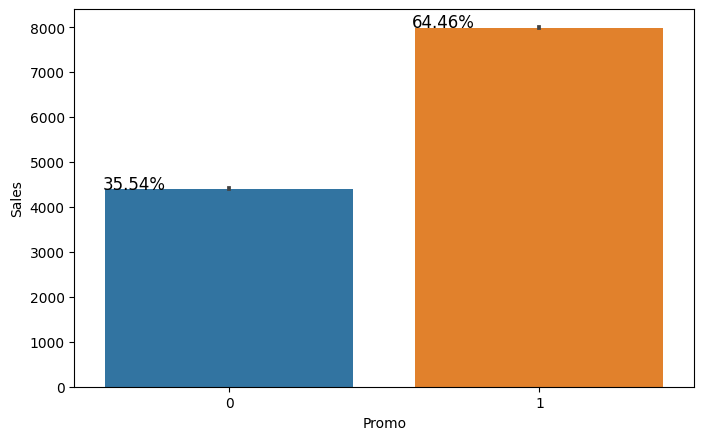

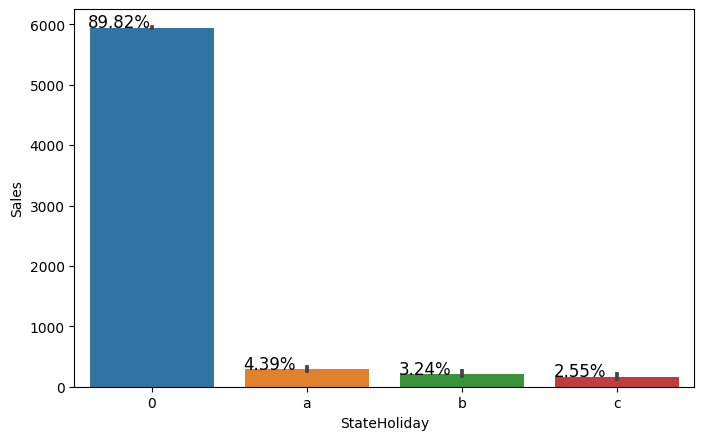

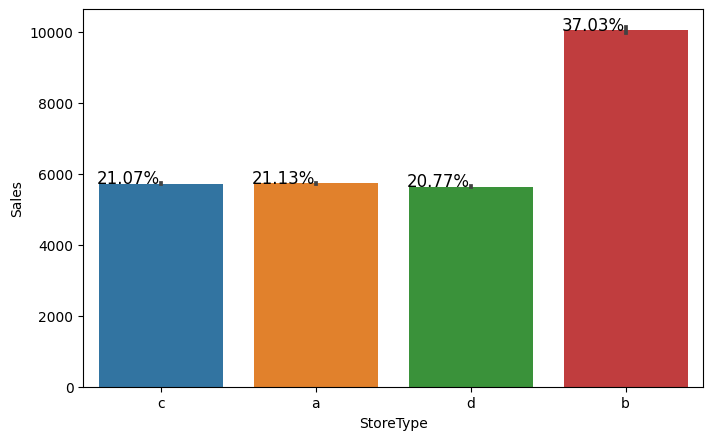

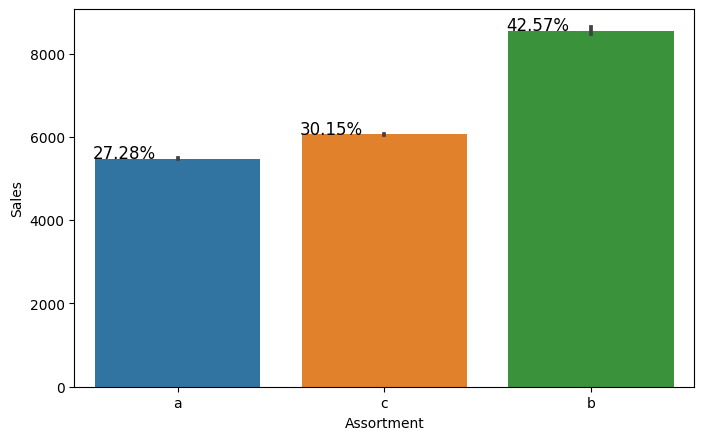

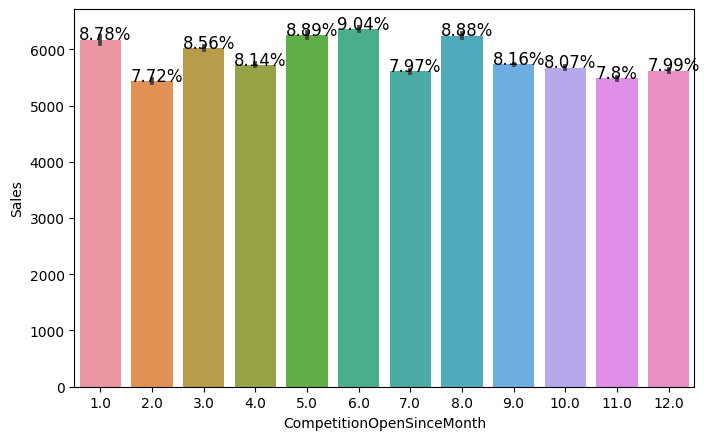

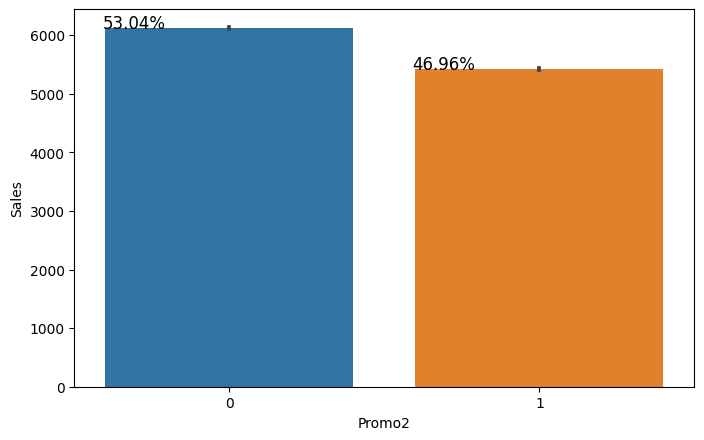

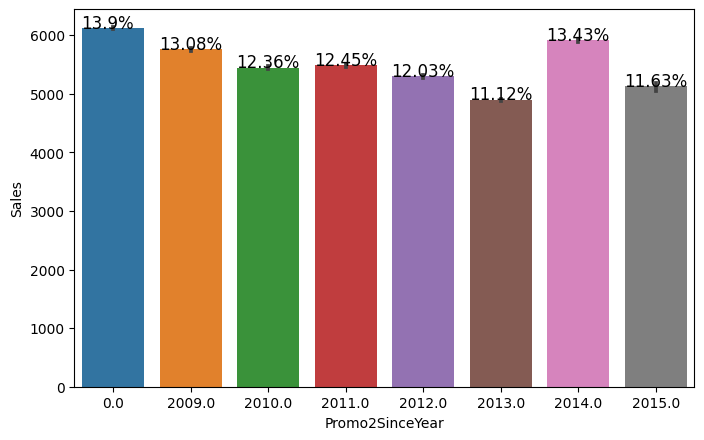

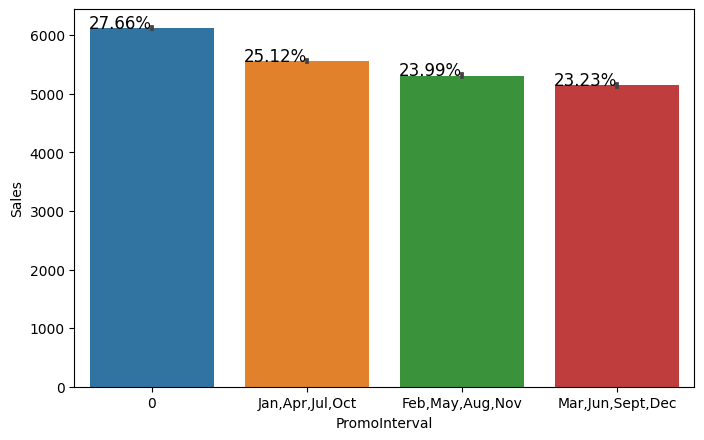

In [21]:
#Code for barplots of the categorical variables aganist sales
#Iterating over the categorical variables and plotting each of them
categorical_variables=['DayOfWeek','Open','Promo','StateHoliday','StoreType','Assortment','CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax=sns.barplot(x=df[value],y=df['Sales'])
  totals=[]
  for i in ax.patches: #for every patch in the barplot ax
    totals.append(i.get_height()) #append height for each patch
  
  total=sum(totals) # sum of each patch height for a plot
  
  for i in ax.patches:
    ax.text(i.get_x()-.01,i.get_height()+.5,str(round((i.get_height()/total)*100,2))+'%',fontsize=12) # text position and fotmula for percentage
  plt.show()

<h4>Observation</h4>
<li>There were more sales on Monday, probably because shops generally remain closed on Sunday.</li>
<li>It could be seen that the promo leads to more sales.</li>
<li>Normally all stores with few exceptions are closed on state holidays. Note that all schools are closed on public holidays and weekends. a=public holiday, b= Easter holiday, c=christmas, 0=None. Lowest of sales were seen on state holidays especially on christmas.</li>
<li>More stores were open on school holidays than on state holidays and hence had more sales than state holidays.</li>
<li>On an average store type B had the higest sales.</li>
<li>Highest average sales were seen with Assortment levels-b which is 'Extra'.</li>
<li>With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.</li>

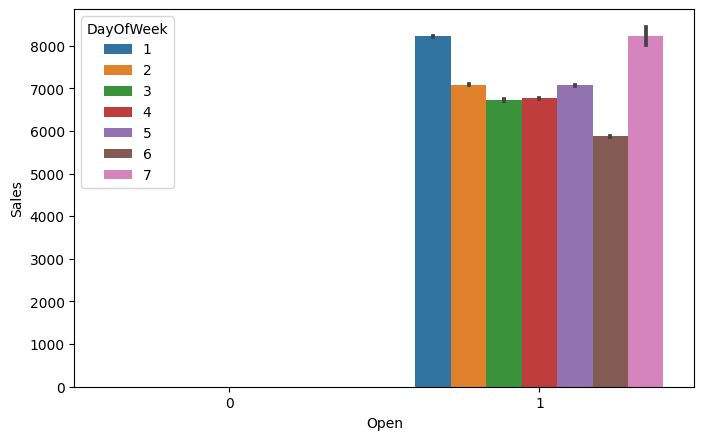

In [23]:
#Open and store type relationship
#This indicates - open suggets that whether the store was open or closed for refurbishment and weekend or holidays
sns.barplot(x=df["Open"],y=df['Sales'],hue=df["DayOfWeek"])

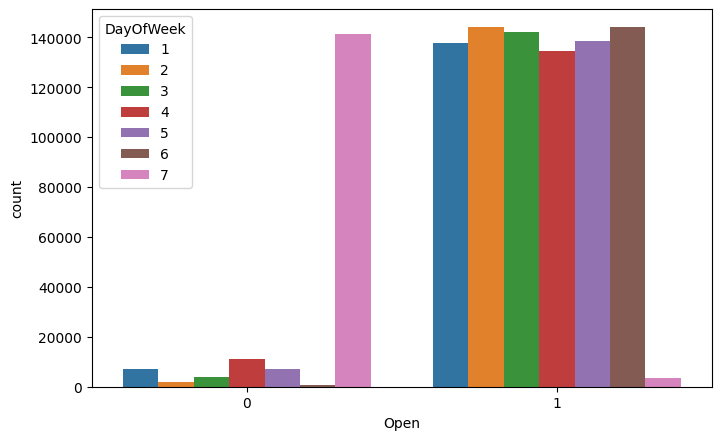

In [24]:
#Lets see open, how many shops are open on which days
#And this gives a counts of stores closed for refurbishment and suggests that most stores are closed on Sunday
sns.countplot(x=df["Open"],hue=df["DayOfWeek"])

<h5>Observation</h5>
This is a count plot of open shops according to the day of the week. Its clear that the number of shopes open on sunday were very less and hence low sales. some shops were closed on weekdays as well accounting to the stores closed due to refurbishment or holidays.

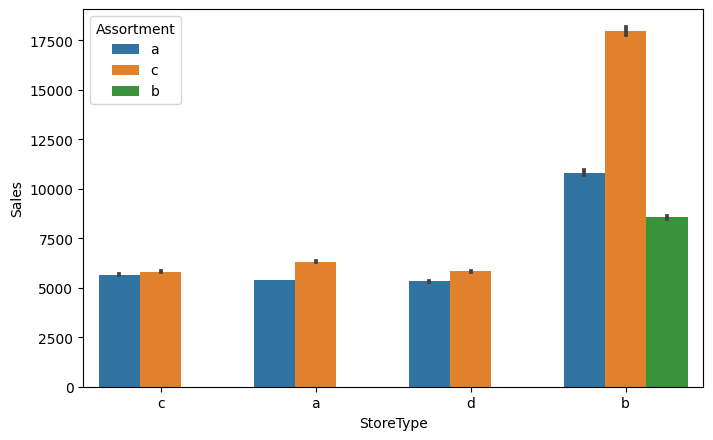

In [25]:
#Lets check the relationship between store type, assortment levels and sales
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])

<h5>Observation</h5>
<p>The above bar plot shows that the store types a,c and d have only assortment level a and c. On the other hand the store type b has all the three kind of assortment strategies a reason why average sales were high for store type b stores</p>